In [16]:
import pandas as pd
import matplotlib.pyplot as plt

MODEL_LIST = ['14m', '31m', '70m', '160m', '410m', '1b']

def plot_syntaxgym_result(suite_name, suite_subset, condition, title=None, babylm_data=None):
        
    # Load data from all CSV files
    dataframes = []
    for model in MODEL_LIST:
        data = pd.read_csv(f'results/pythia-{model}_{suite_name}.csv')
        dataframes.append(data)

    # Combine the data into a single DataFrame
    data_combined = pd.concat(dataframes, keys=MODEL_LIST, names=['Model', 'Index'])
    data_combined.reset_index(level='Model', inplace=True)

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(7, 4))

    # Getting unique sorted checkpoints
    unique_checkpoints = sorted(data_combined['Checkpoint'].unique())

    # Plotting data for each model and condition
    for model in data_combined['Model'].unique():
        subset = data_combined[
            (data_combined['Model'] == model) &
            (data_combined['Condition'] == condition) &
            (data_combined['Suite Name'] == suite_subset)
        ]
        # Mapping actual checkpoints to evenly spaced indices
        x_mapped = [unique_checkpoints.index(chkpt) for chkpt in subset['Checkpoint']]
        ax.plot(x_mapped, subset['Results'], marker='o', label=f'{model}')

    # Plotting the control model as a horizontal line if data is provided
    if babylm_data is not None:
        control_result = babylm_data[
            (babylm_data['Condition'] == condition) &
            (babylm_data['Suite Name'] == suite_subset)
        ]['Results'].values[0]
        ax.axhline(y=control_result, color='gray', linestyle='--', label='BabyLM Model')

    # Set actual checkpoint numbers as x-axis labels
    ax.set_xticks(range(len(unique_checkpoints)))
    ax.set_xticklabels([str(ckpt) for ckpt in unique_checkpoints])

    # Adding labels and title
    ax.set_xlabel('Checkpoint')
    ax.set_ylabel('Results')
    ax.set_title(title)
    ax.legend(title='Pythia Model', loc='upper left')

    # Show plot
    plt.show()

## Subject-Verb Number Agreement

In [17]:
babylm_model_data = pd.read_csv('results/control_agreement_gpt2_v2_seed0_agreement.csv')

### Subject-Verb Number Agreement (with prepositional phrase)

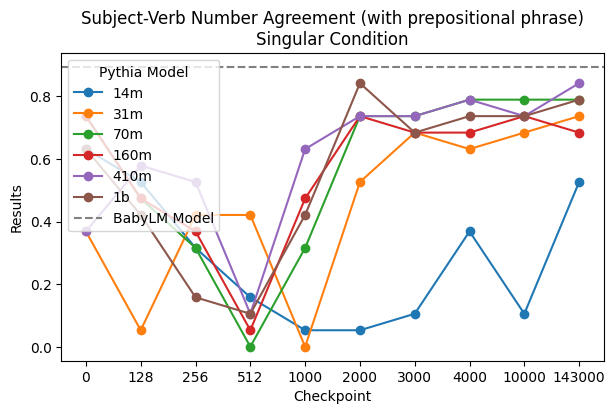

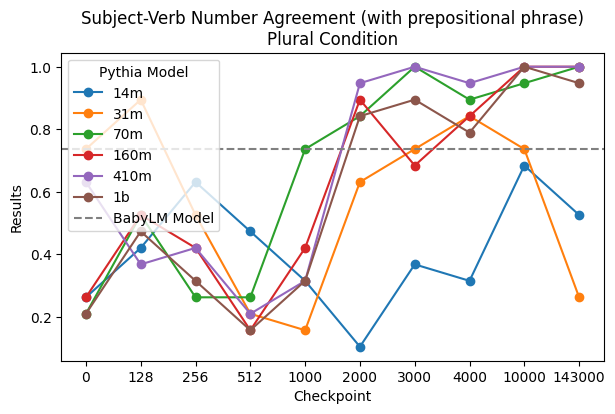

In [18]:
plot_syntaxgym_result("agreement","number_prep", "singular_acc", title="Subject-Verb Number Agreement (with prepositional phrase)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("agreement","number_prep", "plural_acc", title="Subject-Verb Number Agreement (with prepositional phrase)\nPlural Condition", babylm_data=babylm_model_data)

### Subject-Verb Number Agreement (with object relative clause)

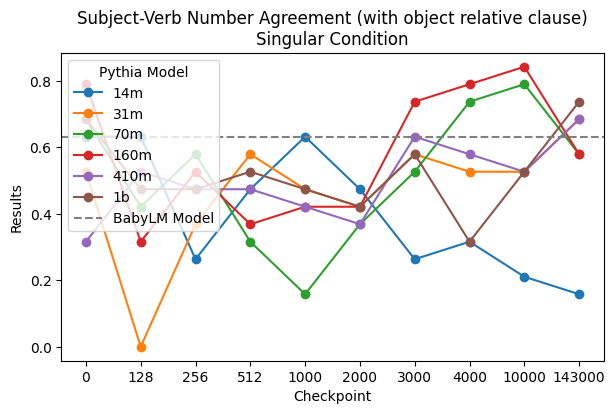

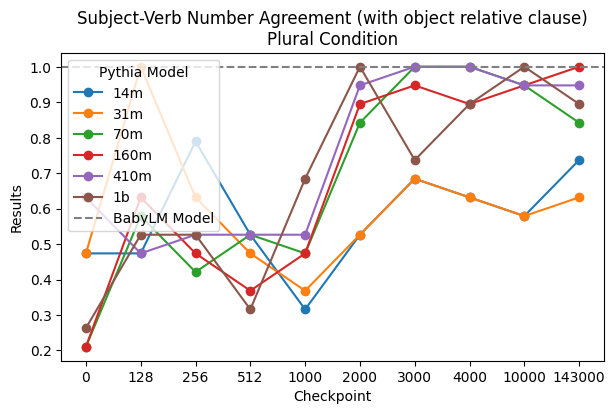

In [19]:
plot_syntaxgym_result("agreement","number_orc", "singular_acc", title="Subject-Verb Number Agreement (with object relative clause)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("agreement","number_orc", "plural_acc", title="Subject-Verb Number Agreement (with object relative clause)\nPlural Condition", babylm_data=babylm_model_data)

### Subject-Verb Number Agreement (with subject relative clause)

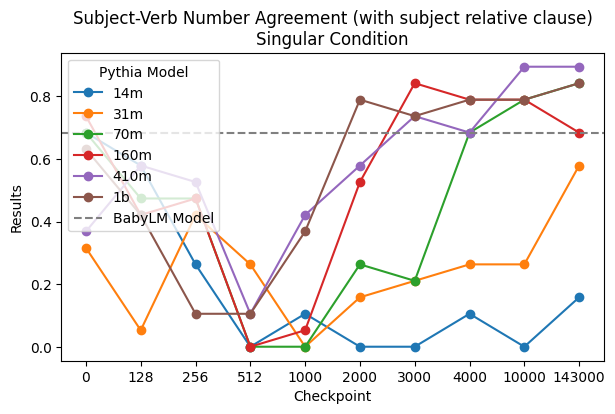

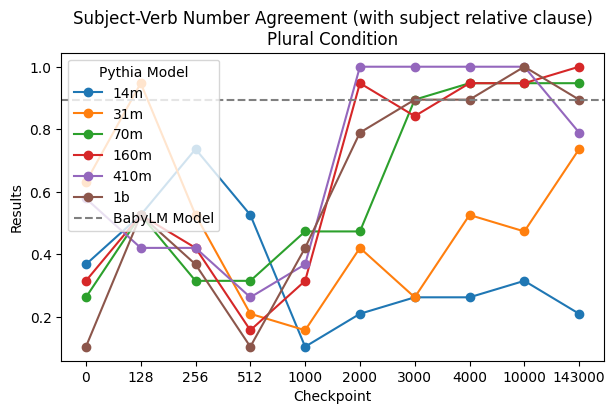

In [20]:
plot_syntaxgym_result("agreement","number_src", "singular_acc", title="Subject-Verb Number Agreement (with subject relative clause)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("agreement","number_src", "plural_acc", title="Subject-Verb Number Agreement (with subject relative clause)\nPlural Condition", babylm_data=babylm_model_data)

## NPI Licensing

### Negative Polarity Licensing (any; with object relative clause)

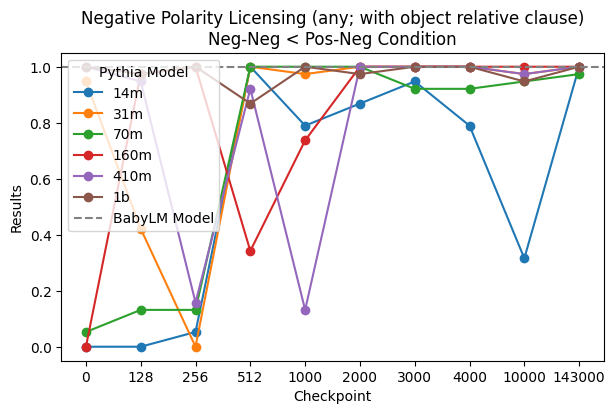

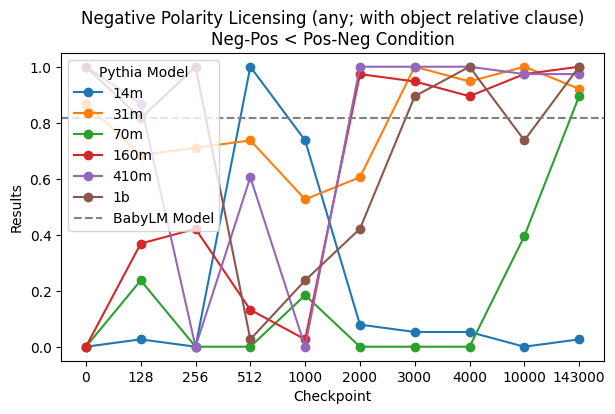

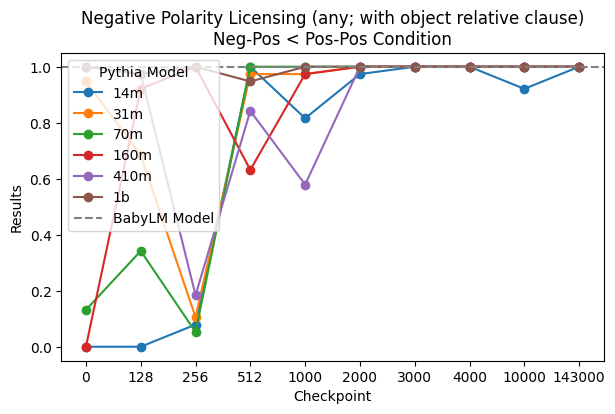

In [21]:
babylm_model_data = pd.read_csv('results/control_agreement_gpt2_v2_seed0_licensing.csv')

plot_syntaxgym_result("licensing", "npi_orc_any", "pred1_acc", title="Negative Polarity Licensing (any; with object relative clause)\nNeg-Neg < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing", "npi_orc_any", "pred2_acc", title="Negative Polarity Licensing (any; with object relative clause)\nNeg-Pos < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing", "npi_orc_any", "pred3_acc", title="Negative Polarity Licensing (any; with object relative clause)\nNeg-Pos < Pos-Pos Condition", babylm_data=babylm_model_data)

### Negative Polarity Licensing (ever; with object relative clause)

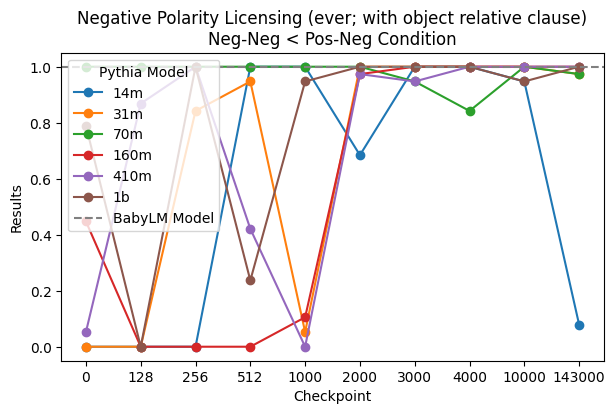

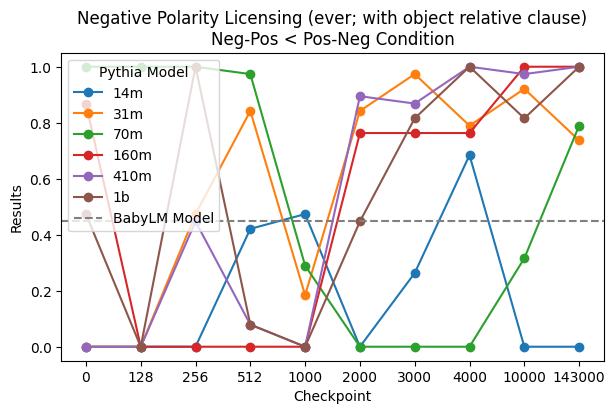

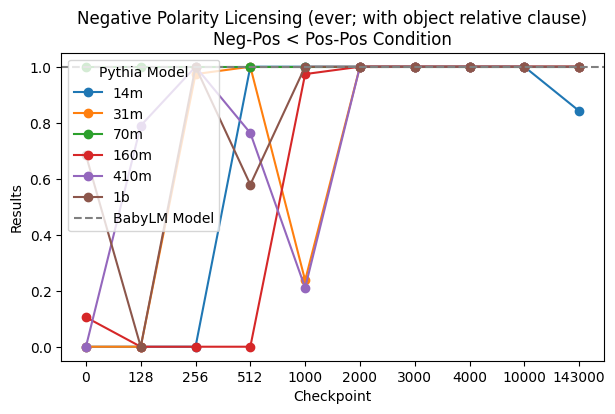

In [22]:
plot_syntaxgym_result("licensing", "npi_orc_ever", "pred1_acc", title="Negative Polarity Licensing (ever; with object relative clause)\nNeg-Neg < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing", "npi_orc_ever", "pred2_acc", title="Negative Polarity Licensing (ever; with object relative clause)\nNeg-Pos < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing", "npi_orc_ever", "pred3_acc", title="Negative Polarity Licensing (ever; with object relative clause)\nNeg-Pos < Pos-Pos Condition", babylm_data=babylm_model_data)

### Negative Polarity Licensing (any; with subject relative clause)

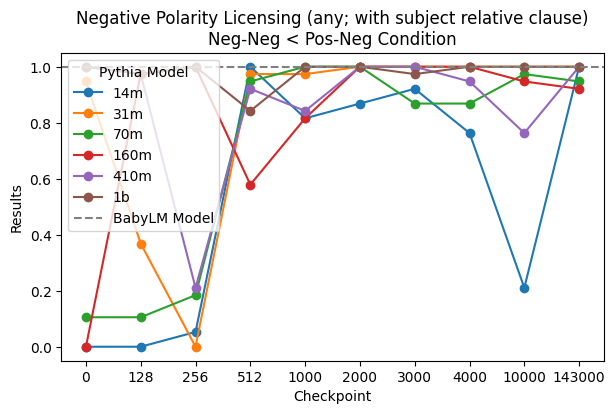

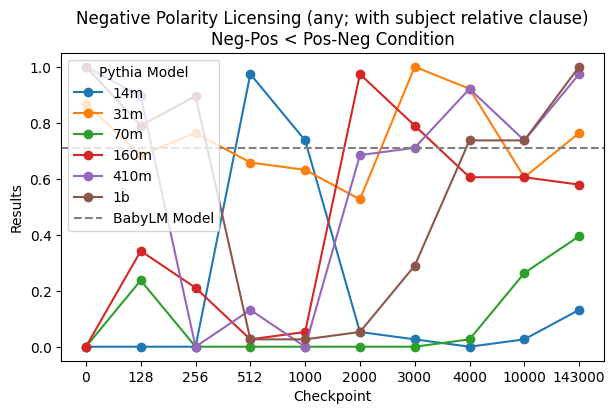

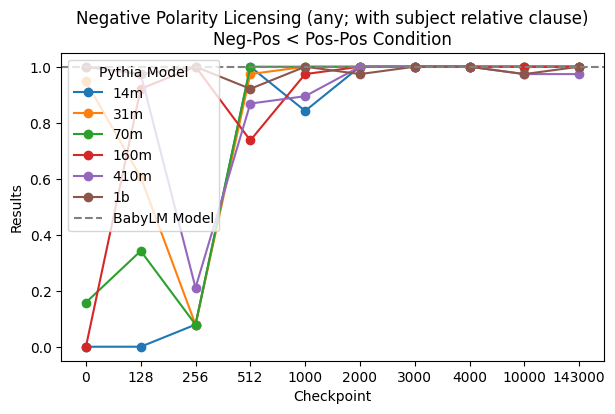

In [23]:
plot_syntaxgym_result("licensing","npi_src_any", "pred1_acc", title="Negative Polarity Licensing (any; with subject relative clause)\nNeg-Neg < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","npi_src_any", "pred2_acc", title="Negative Polarity Licensing (any; with subject relative clause)\nNeg-Pos < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","npi_src_any", "pred3_acc", title="Negative Polarity Licensing (any; with subject relative clause)\nNeg-Pos < Pos-Pos Condition", babylm_data=babylm_model_data)

### Negative Polarity Licensing (ever; with subject relative clause)

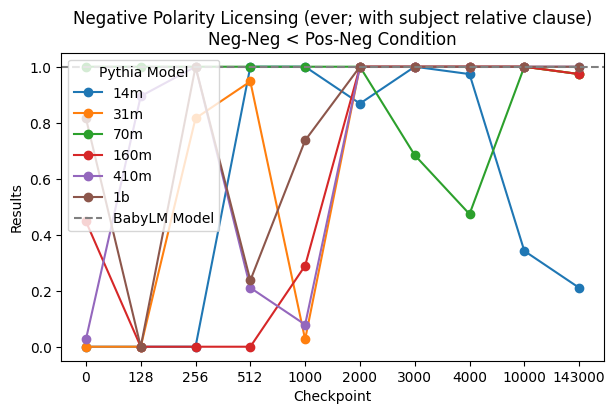

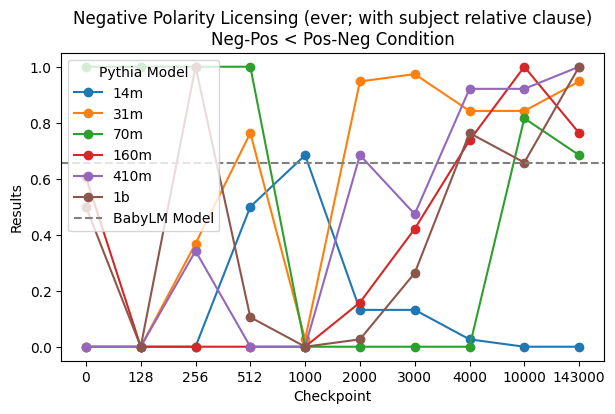

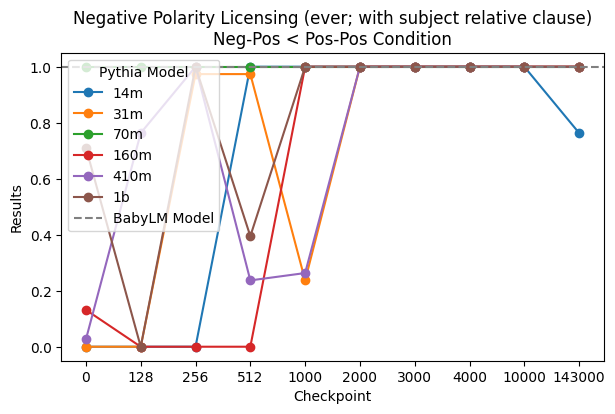

In [24]:
plot_syntaxgym_result("licensing","npi_src_ever", "pred1_acc", title="Negative Polarity Licensing (ever; with subject relative clause)\nNeg-Neg < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","npi_src_ever", "pred2_acc", title="Negative Polarity Licensing (ever; with subject relative clause)\nNeg-Pos < Pos-Neg Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","npi_src_ever", "pred3_acc", title="Negative Polarity Licensing (ever; with subject relative clause)\nNeg-Pos < Pos-Pos Condition", babylm_data=babylm_model_data)

## Reflexive Licensing

### Reflexive Number Agreement (feminine; with object relative clause)

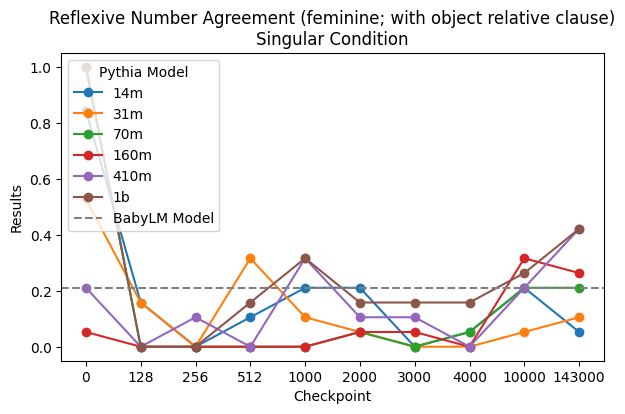

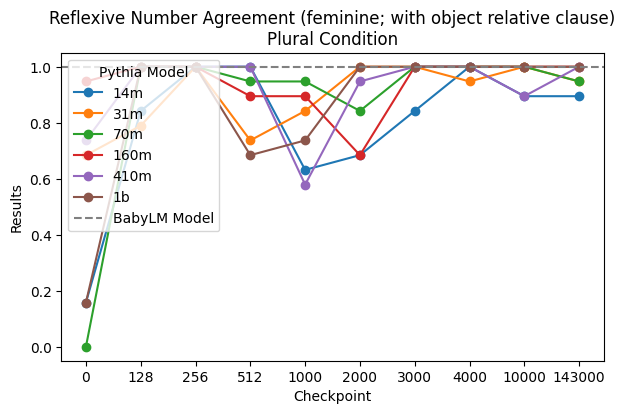

In [25]:
plot_syntaxgym_result("licensing","reflexive_orc_fem", "singular_acc", title="Reflexive Number Agreement (feminine; with object relative clause)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","reflexive_orc_fem", "plural_acc", title="Reflexive Number Agreement (feminine; with object relative clause)\nPlural Condition", babylm_data=babylm_model_data)

### Reflexive Number Agreement (masculine; with object relative clause)

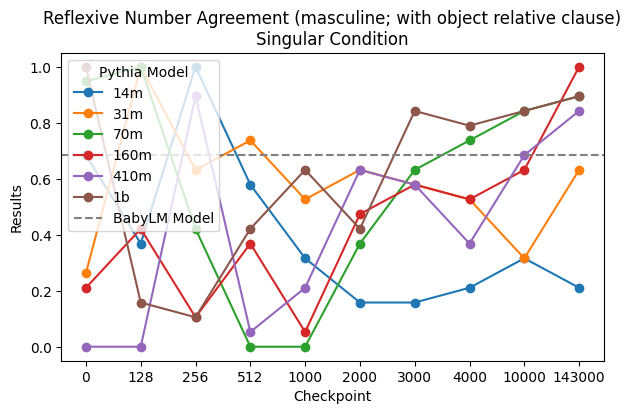

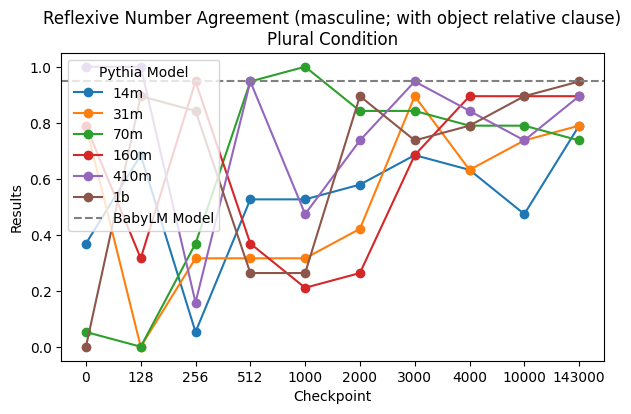

In [26]:
plot_syntaxgym_result("licensing","reflexive_orc_masc", "singular_acc", title="Reflexive Number Agreement (masculine; with object relative clause)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","reflexive_orc_masc", "plural_acc", title="Reflexive Number Agreement (masculine; with object relative clause)\nPlural Condition", babylm_data=babylm_model_data)

### Reflexive Number Agreement (feminine; with prepositional phrase)

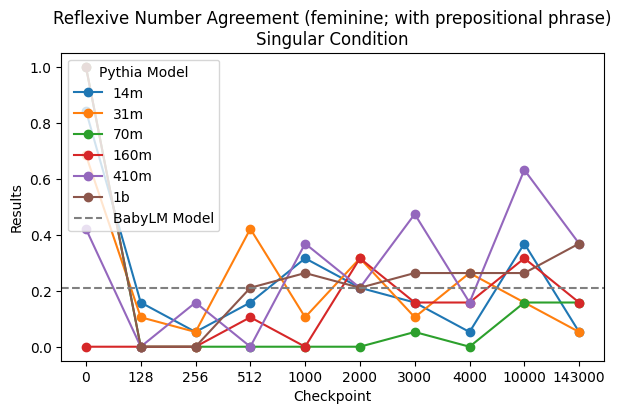

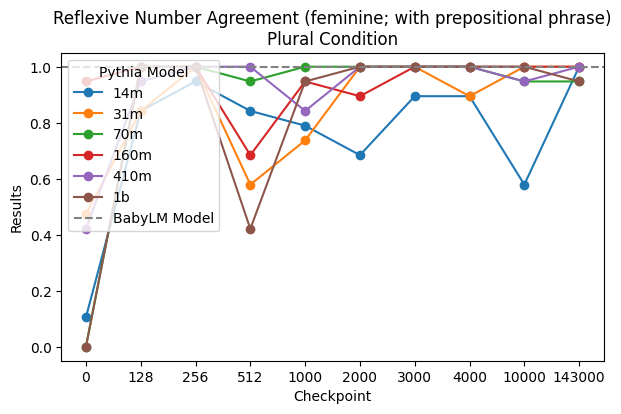

In [27]:
plot_syntaxgym_result("licensing","reflexive_prep_fem", "singular_acc", title="Reflexive Number Agreement (feminine; with prepositional phrase)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","reflexive_prep_fem", "plural_acc", title="Reflexive Number Agreement (feminine; with prepositional phrase)\nPlural Condition", babylm_data=babylm_model_data)

### Reflexive Number Agreement (masculine; with prepositional phrase)

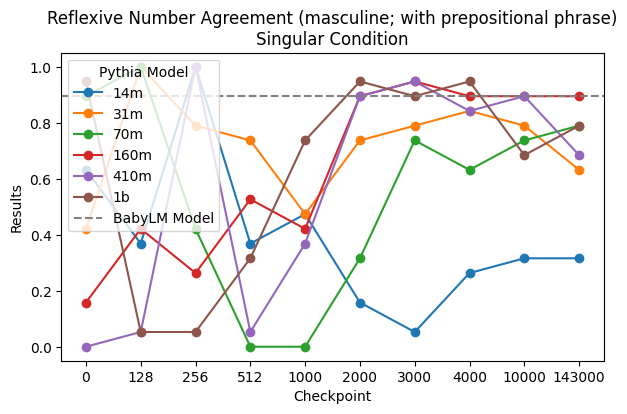

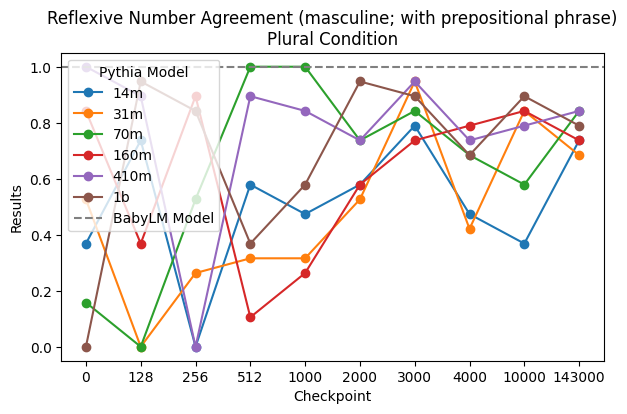

In [28]:
plot_syntaxgym_result("licensing","reflexive_prep_masc", "singular_acc", title="Reflexive Number Agreement (masculine; with prepositional phrase)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","reflexive_prep_masc", "plural_acc", title="Reflexive Number Agreement (masculine; with prepositional phrase)\nPlural Condition", babylm_data=babylm_model_data)

### Reflexive Number Agreement (feminine; with subject relative clause)

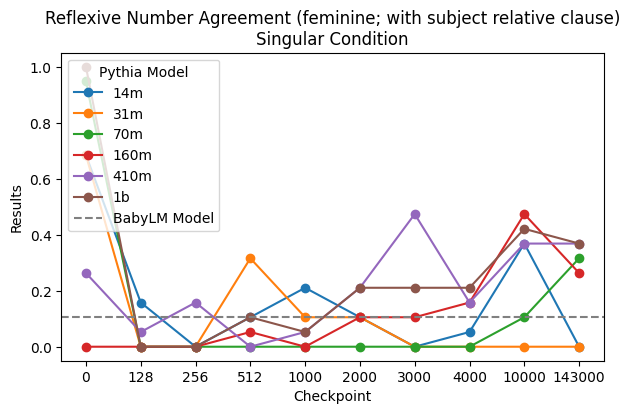

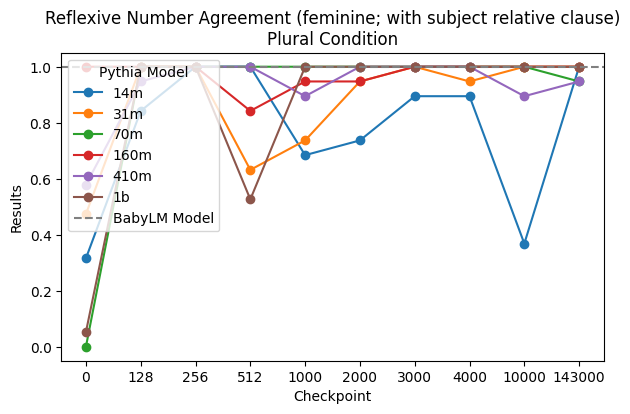

In [29]:
plot_syntaxgym_result("licensing","reflexive_src_fem", "singular_acc", title="Reflexive Number Agreement (feminine; with subject relative clause)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","reflexive_src_fem", "plural_acc", title="Reflexive Number Agreement (feminine; with subject relative clause)\nPlural Condition", babylm_data=babylm_model_data)

### Reflexive Number Agreement (masculine; with subject relative clause)

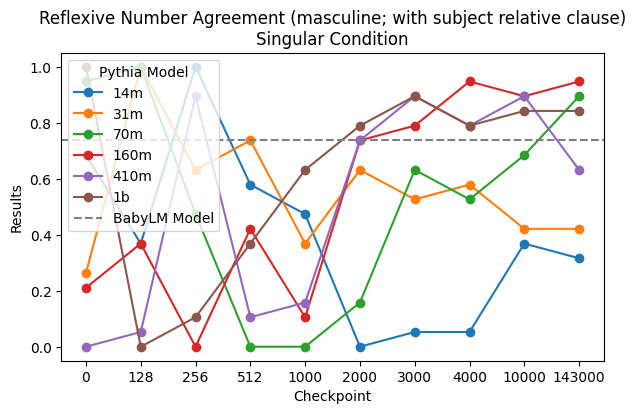

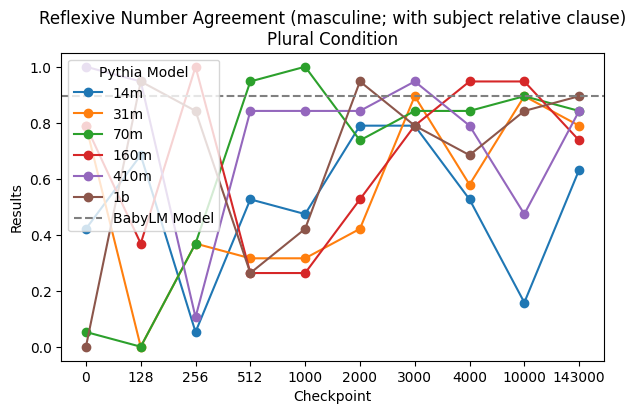

In [30]:
plot_syntaxgym_result("licensing","reflexive_src_masc", "singular_acc", title="Reflexive Number Agreement (masculine; with subject relative clause)\nSingular Condition", babylm_data=babylm_model_data)
plot_syntaxgym_result("licensing","reflexive_src_masc", "plural_acc", title="Reflexive Number Agreement (masculine; with subject relative clause)\nPlural Condition", babylm_data=babylm_model_data)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_syntaxgym_final_results_with_control(suite_name, checkpoint=143000):

    # List of models and file paths for the agreement suite data
    MODEL_LIST = ['14m', '31m', '70m', '160m', '410m', '1b']

    # Load and process the control model data
    control_data_path = f"results/control_agreement_gpt2_v2_seed0_{suite_name}.csv"
    control_data = pd.read_csv(control_data_path)
    control_average_result = control_data['Results'].mean()

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot each model's final checkpoint average over all suite subsets
    for model in MODEL_LIST:
        data = pd.read_csv(f"results/pythia-{model}_{suite_name}.csv")
        # Use only the final checkpoint
        final_data = data[data['Checkpoint'] == checkpoint]
        print(final_data)

        # Average results over all suite subsets
        average_result = final_data['Results'].mean()

        # Plotting the average result for the final checkpoint
        ax.bar(model, average_result, label=f'{model}', zorder=2)

    # Add the control model data as a gray bar
    ax.bar('BabyLM Data', control_average_result, color='gray', label='BabyLM Model', zorder=2)

    # Adding labels and title
    ax.set_xlabel('Model Size')
    ax.set_ylabel('Average Results')

    title = f'Average Results for {suite_name.capitalize()} Suite'
    ax.set_title(title)
    ax.grid(zorder=-1)

    # Show plot
    plt.show()

     Suite Name  Checkpoint     Condition   Results
42  number_prep        4000  singular_acc  0.368421
43  number_prep        4000    plural_acc  0.315789
44   number_orc        4000  singular_acc  0.315789
45   number_orc        4000    plural_acc  0.631579
46   number_src        4000  singular_acc  0.105263
47   number_src        4000    plural_acc  0.263158
     Suite Name  Checkpoint     Condition   Results
42  number_prep        4000  singular_acc  0.631579
43  number_prep        4000    plural_acc  0.842105
44   number_orc        4000  singular_acc  0.526316
45   number_orc        4000    plural_acc  0.631579
46   number_src        4000  singular_acc  0.263158
47   number_src        4000    plural_acc  0.526316
     Suite Name  Checkpoint     Condition   Results
42  number_prep        4000  singular_acc  0.789474
43  number_prep        4000    plural_acc  0.894737
44   number_orc        4000  singular_acc  0.736842
45   number_orc        4000    plural_acc  1.000000
46   number_

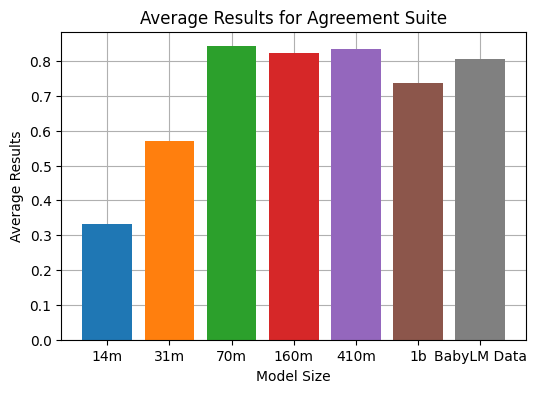

              Suite Name  Checkpoint     Condition   Results
168          npi_orc_any        4000     pred1_acc  0.789474
169          npi_orc_any        4000     pred2_acc  0.052632
170          npi_orc_any        4000     pred3_acc  1.000000
171          npi_src_any        4000     pred1_acc  0.763158
172          npi_src_any        4000     pred2_acc  0.000000
173          npi_src_any        4000     pred3_acc  1.000000
174         npi_orc_ever        4000     pred1_acc  1.000000
175         npi_orc_ever        4000     pred2_acc  0.684211
176         npi_orc_ever        4000     pred3_acc  1.000000
177         npi_src_ever        4000     pred1_acc  0.973684
178         npi_src_ever        4000     pred2_acc  0.026316
179         npi_src_ever        4000     pred3_acc  1.000000
180   reflexive_prep_fem        4000  singular_acc  0.052632
181   reflexive_prep_fem        4000    plural_acc  0.894737
182    reflexive_orc_fem        4000  singular_acc  0.052632
183    reflexive_orc_fem

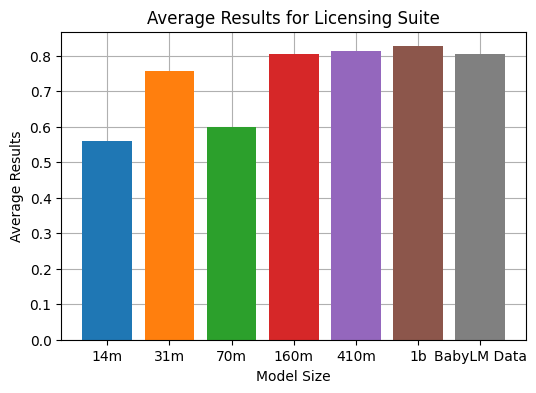

In [63]:
# Generate the bar plot with the control data included and the specified title
plot_syntaxgym_final_results_with_control("agreement", checkpoint=4000)
plot_syntaxgym_final_results_with_control("licensing", checkpoint=4000)